In [1]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import gsw
import gvpy as gv

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
%matplotlib ipympl

In [3]:
# path to netcdf files
nc_dir = Path("nc/")
# list all netcdf files
nc_files = nc_dir.glob("*.nc")
# read all time series into a list
t_all = [xr.open_dataarray(file) for file in nc_files]

<Axes: ylabel='temperature [°C]'>

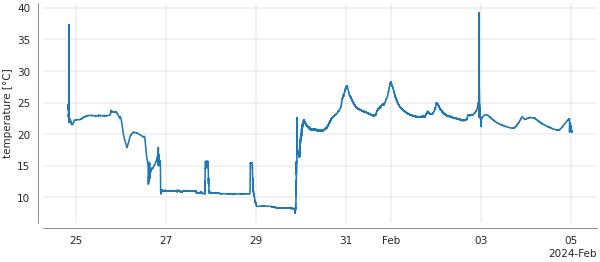

In [16]:
t_all[0].gv.plot()

In [4]:
# define a common time vector at 1s resolution for the time of interest
tnew = np.arange("2024-01-26 21:00", "2024-01-29 21:00", dtype="datetime64[s]").astype(
    "datetime64[ns]"
)

In [5]:
# interpolate all time series to the new time vector
t_sel = [ti.interp(time=tnew) for ti in t_all]

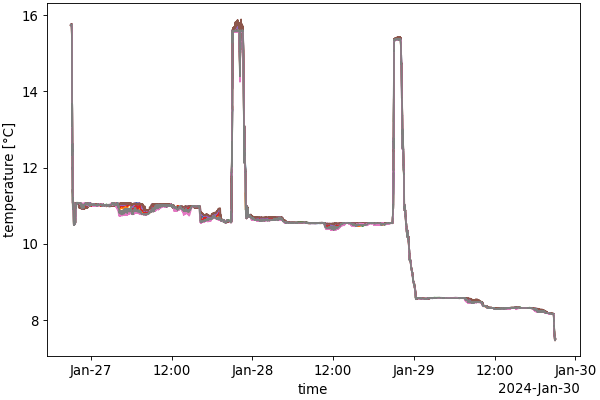

In [6]:
# plot all time series together
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5),
                       constrained_layout=True)
[ti.plot(ax=ax) for ti in t_sel];

In [7]:
# chain config
sn = [230741, 207308, 230760, 207382, 230759, 230740, 230755, 230758, 207307]
cm = [24.13, 50.8, 78.105, 105.41, 132.715, 160.02, 186.182, 212.09, 238.76]
# generate a dict for easier access
chain_info = {sni : cmi for (sni, cmi) in zip(sn, cm) }

In [8]:
# assign distance as meta data to each time series
for ti in t_sel:
    ti.attrs["dist_cm"] = chain_info[ti.SN]

In [9]:
# get all distances in order of the time series list
dist = np.array([ti.dist_cm for ti in t_sel]) / 100

In [10]:
# concat all time series into a 2d array with new dimension "dist"
t = xr.concat(t_sel, dim="dist")
t.attrs = dict(long_name='temperature', units='°C')

In [11]:
# assign coordinate "dist"
t.coords["dist"] = (("dist"), dist)
t.dist.attrs = dict(long_name='distance', units='m')

In [12]:
# sort in new coordinate
t = t.sortby("dist")

Plot temperature time series

<Axes: ylabel='distance [m]'>

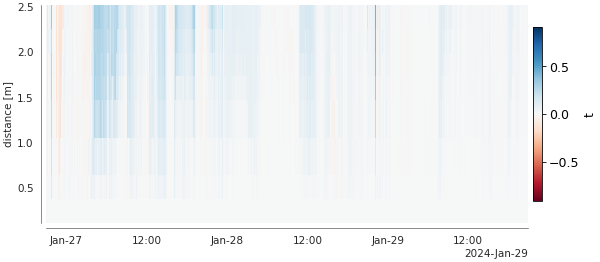

In [13]:
(t - t.isel(dist=0)).gv.plot(cmap="RdBu")

<Axes: ylabel='distance [m]'>

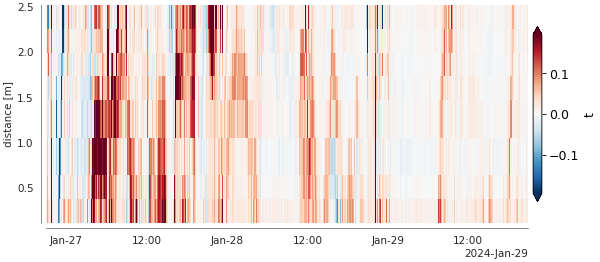

In [19]:
t.differentiate(coord="dist").gv.plot(cmap="RdBu_r", robust=True)

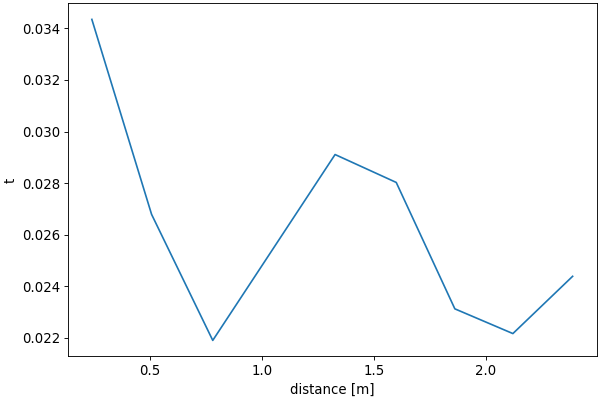

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5),
                       constrained_layout=True)
t.differentiate(coord="dist").mean("time").plot()

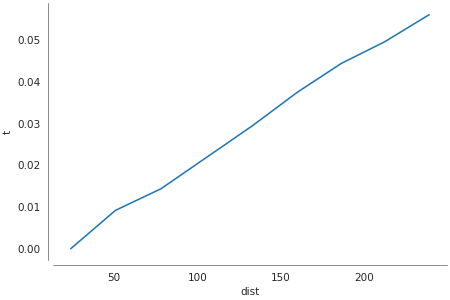

In [59]:
fig, ax = gv.plot.quickfig()
(t - t.isel(dist=0)).mean("time").plot()

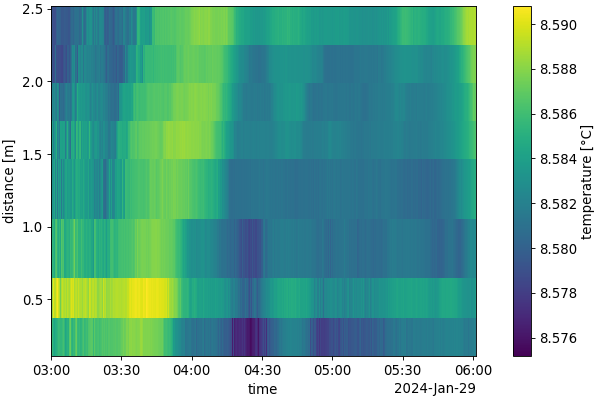

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5, 5),
                       constrained_layout=True)
t.sel(time=slice("2024-01-29 03:00", "2024-01-29 06:00")).plot()

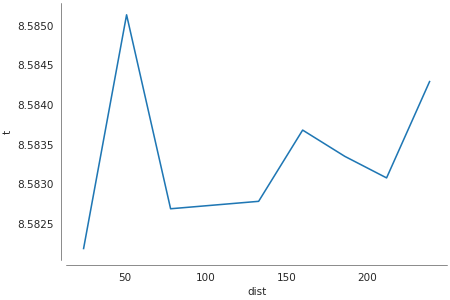

In [51]:
fig, ax = gv.plot.quickfig()
t.sel(time=slice("2024-01-29 03:00", "2024-01-29 06:00")).mean("time").plot()